In [2]:
import pandas as pd
df_gene_info = pd.read_csv('../data/geneinfo_beta.txt', sep='\t')       # Metadata for genes (the features of the data matrices)
df_gene_info = df_gene_info[['gene_symbol','feature_space']]
df_sig_info = pd.read_csv('../data/siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles
df_sig_info = df_sig_info[['sig_id', 'cmap_name', 'pert_type', 'cell_iname', 'pert_itime']]
# rename cmap_name to gene_symbol
df_sig_info = df_sig_info.rename(columns={'cmap_name': 'gene_symbol'})

/tmp/ipykernel_426301/2112581984.py:4: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sig_info = pd.read_csv('../data/siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles


In [3]:
# create control group dataframe with rows where pert_type contains 'ctl'
df_control = df_sig_info[df_sig_info['pert_type'].str.contains('ctl')]
df_compound = df_sig_info[df_sig_info['pert_type'].str.contains('trt_cp')]
# create a new dataframe with the rows where pert_type either contains oe, sh, or xpr
df_oe_sh_xpr = df_sig_info[df_sig_info['pert_type'].str.contains('oe|sh|xpr')]

In [4]:
# print the shapes of the dataframes
print("Shape of df_gene_info:", df_gene_info.shape)
print("Shape of df_sig_info:", df_sig_info.shape)
print("Shape of df_control:", df_control.shape)
print("Shape of df_compound:", df_compound.shape)
print("Shape of df_oe_sh_xpr:", df_oe_sh_xpr.shape)

Shape of df_gene_info: (12328, 2)
Shape of df_sig_info: (1201944, 5)
Shape of df_control: (59978, 5)
Shape of df_compound: (720216, 5)
Shape of df_oe_sh_xpr: (413467, 5)


In [5]:
# do a left join on df_oe_sh_xpr and df_gene_info on gene_symbol
df_oe_sh_xpr_OG = df_oe_sh_xpr.copy()
df_oe_sh_xpr = df_oe_sh_xpr.merge(df_gene_info, on='gene_symbol', how='inner')

# print n experiments with known target
print("Number of experiments with known target:", len(df_oe_sh_xpr))

Number of experiments with known target: 310699


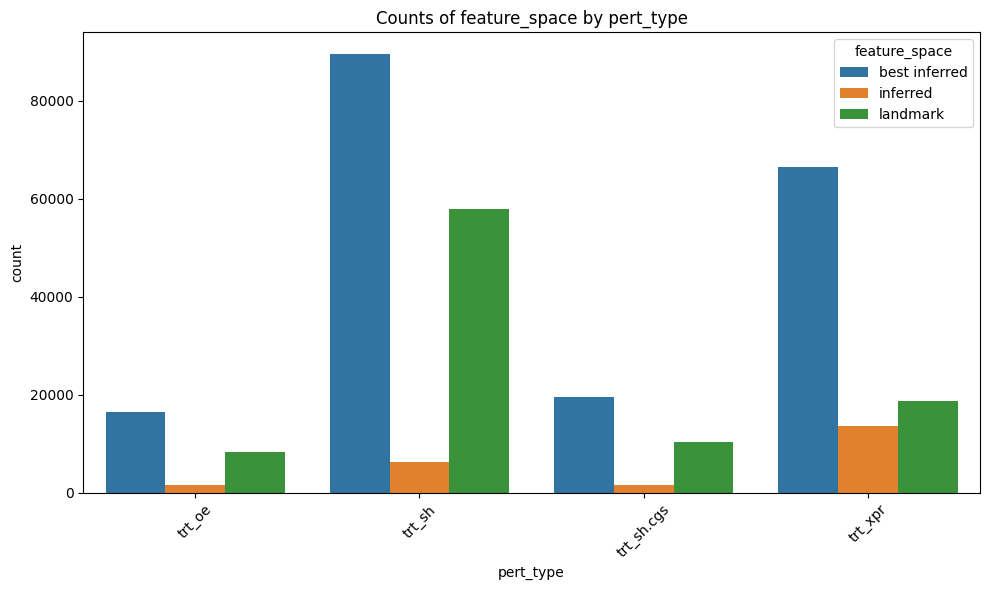

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the number of rows with feature_space and the number of rows with feature_space == NaN
df_counts = df_oe_sh_xpr.groupby(['pert_type', 'feature_space']).size().unstack(fill_value=0)
df_counts = df_counts.reset_index()
df_counts = df_counts.melt(id_vars='pert_type', var_name='feature_space', value_name='count')
# create a barplot with two bars per pert_type. one counting the rows with feature_space and one counting the rows with feature_space == NaN
plt.figure(figsize=(10, 6))
sns.barplot(x='pert_type', y='count', hue='feature_space', data=df_counts)
plt.title('Counts of feature_space by pert_type')
plt.xlabel('pert_type')
plt.ylabel('count')
plt.legend(title='feature_space')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [7]:
# create a dataframe with one row per gene_symbol and the number of experiments with that gene_symbol as well as the feature_space
df_counts = df_oe_sh_xpr.groupby(['gene_symbol', 'feature_space']).size().reset_index(name='count')
# sort the dataframe by count
df_counts = df_counts.sort_values(by='count', ascending=False)
df_counts


,gene_symbol,feature_space,count
1112,COASY,landmark,801
2324,HADH,landmark,751
769,CCNA2,landmark,740
372,ASAH1,landmark,692
1610,EGFR,landmark,646
...,...,...,...
6245,ZNF821,best inferred,1
6246,ZNF83,best inferred,1
6251,ZSCAN12,best inferred,1
6252,ZSCAN2,inferred,1


In [8]:
# save the dataframe to a csv file
df_counts.to_csv('../data/target_counts.csv', index=False)

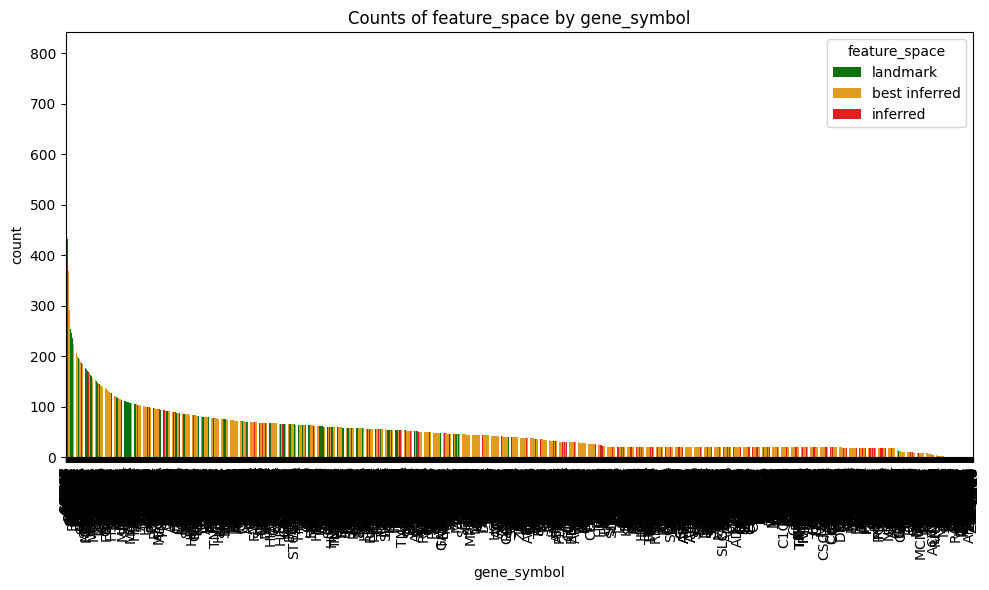

In [9]:
# create a barplot plotting the count per gene_symbol. the bar should be colored according to the feature_space
# create a color palette with 3 colors. green = landmark orange = best inferred red = inferred

palette = {'landmark': 'green', 'best inferred': 'orange', 'inferred': 'red'}
plt.figure(figsize=(10, 6))
sns.barplot(x='gene_symbol', y='count', hue='feature_space', data=df_counts, palette=palette)
plt.title('Counts of feature_space by gene_symbol')
plt.xlabel('gene_symbol')
plt.ylabel('count')
plt.legend(title='feature_space')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  